In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import re
import datetime as datetime
import pandas as pd
import numpy as np
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


avisos = pd.read_csv('/home/pcsor/facu/TP2/entrega6/fiuba_6_avisos_detalle.csv', sep=',', encoding='utf-8', low_memory=False)

In [23]:
stopw = 'un,de,https,una,unas,unos,uno,sobre,todo,por,tambien,tras,otro,algun,alguno,alguna,algunos,algunas,ser,es,soy,eres,somos,sos,estoy,esta,estamos,estas,estan,como,en\
,para,atras,porque,por que,estado,estaba,ante,antes,siendo,ambos,pero,por,poder,puede,puedo,podemos,podes,pueden,fui,fue,fuimos,fueron,hacer,hago,hace,hacemos,haceis,hacen\
,cada,fin,incluso,primero,desde,ir,voy,va,vamos,vais,van,vaya,bueno,ha,tener,tengo,tiene,tenemos,teneis,tienen,el,la,lo,las,los,su,aqui,mio,tuyo,ellos,ellas,nos,nosotros\
,vosotros,vosotras,si,dentro,solo,solamente,ultimo,largo,haces,usted,ustedes,muchos,aquellos,aquellas,sus,entonces,cierto,ciertos,cierta,ciertas,intentar,intento,intenta,intentas\
,intentais,intentan,dos,bajo,arriba,encima,usar,uso,usas,usa,usamos,usais,usan,emplear,empleo,empleas,emplean,ampleamos,empleais,valor,muy,eras,eramos,eran,modo,bien,cual\
,cuando,donde,mientras,quien,con,entre,sin,podria,podrias,podriamos,podrian,podriais,yo,aquel,intentamos,ev,busqueda,ingresar,queres,haciendo,importante,encuentra\
,encontramos,debe,argentina,nuestro,ubicada,inscribirse,se,in,est,anos,NaN'
stopw = stopw.split(',')

In [24]:
descrip = avisos[['idaviso','descripcion','titulo']]

In [25]:
descrip.loc[:,'descripcion'] = descrip['descripcion'].apply(lambda s: re.sub('<.*?>', '', s)) #####saco todo lo que sea codigo HTML
descrip.loc[:,'descripcion'] = descrip['descripcion'].apply(lambda s: re.sub(r'[^\w]', ' ', s)) ##### saco todo lo que no sea alfanumerico
descrip.loc[:,'descripcion'] = descrip['descripcion'].apply(lambda s: s.lower()) ###### lo paso a minuscula
descrip.loc[:,'descripcion'] = descrip['descripcion'].apply(lambda s: unidecode.unidecode(s)) ####### saco los acentos
descrip.loc[:,'descripcion'] = descrip['descripcion'].apply(lambda s: re.sub(r'\b\w{1,3}\b', '', s)) ###### remuevo las palabras cortas
descrip.loc[:,'descripcion'] = descrip['descripcion'].apply(lambda s: re.sub(' +',' ',s)) ###### remuevo los espacios en blanco de mas
descrip.loc[:,'titulo'] = descrip['titulo'].apply(lambda s: s.lstrip()) ###### remuevo los espacios en blanco de mas
descrip.loc[:,'titulo'] = descrip['titulo'].apply(lambda s: re.sub('<.*?>', '', s)) #####saco todo lo que sea codigo HTML
descrip.loc[:,'titulo'] = descrip['titulo'].apply(lambda s: re.sub(r'[^\w]', ' ', s)) ##### saco todo lo que no sea alfanumerico
descrip.loc[:,'titulo'] = descrip['titulo'].apply(lambda s: s.lower()) ###### lo paso a minuscula
descrip.loc[:,'titulo'] = descrip['titulo'].apply(lambda s: unidecode.unidecode(s)) ####### saco los acentos
descrip.loc[:,'titulo'] = descrip['titulo'].apply(lambda s: re.sub(r'\b\w{1,3}\b', '', s)) ###### remuevo las palabras cortas
descrip.loc[:,'titulo'] = descrip['titulo'].apply(lambda s: re.sub(' +',' ',s)) ###### remuevo los espacios en blanco de mas
descrip.loc[:,'titulo'] = descrip['titulo'].apply(lambda s: s.lstrip()) ###### remuevo los espacios en blanco de mas

/home/pcsor/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### TFIDF + SVD

* aplico tfidf a cada descripcion de los anuncios el resultado a una Sparce Matrix
* aplico al resultado SVD quedandome con los 100 'conceptos' mas representativos 

In [26]:
tfidf = TfidfVectorizer(stop_words = stopw)
sparseM = tfidf.fit_transform(descrip['descripcion'])
sparseMT = tfidf.fit_transform(descrip['titulo'])
sparseMT.shape, sparseM.shape

((18299, 4754), (18299, 44489))

In [27]:
conceptColumns = TruncatedSVD(n_components=100).fit_transform(sparseM)
conceptTitle = TruncatedSVD(n_components=20).fit_transform(sparseMT)

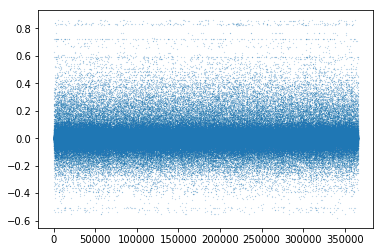

In [28]:
plt.scatter(x = range(0,conceptTitle.size), y = conceptTitle, s=0.01)

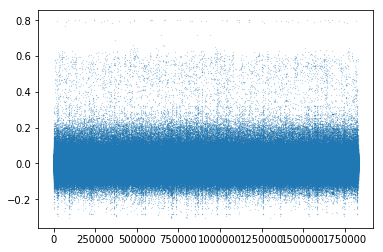

In [29]:
plt.scatter(x = range(0,conceptColumns.size), y = conceptColumns, s=0.01)

Simple visualizacion para ver la discribución de valores de los elementos de la matriz reducida

In [30]:
conceptos = pd.DataFrame(conceptColumns)
titulos = pd.DataFrame(conceptTitle)

In [31]:
conceptos['idaviso'] = descrip['idaviso']
titulos['idaviso'] = descrip['idaviso']

In [32]:
conceptos.to_csv('/home/pcsor/facu/TP2/conceptos.csv')
titulos.to_csv('/home/pcsor/facu/TP2/titulos.csv')